In [19]:
import glob
import pandas as pd 

In [16]:
datathon_files = glob.glob(r'C:\Users\Thomas\Documents\GitHub\datathon_summer_2019\data\*\*.csv')
waittime_file = glob.glob(r'C:\Users\Thomas\Documents\GitHub\datathon_summer_2019\data\*.xlsx')


In [22]:
datathon_files

['C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\canada_data\\consolidated_legend.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\canada_data\\drug_spending.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\canada_data\\expenditure_by_type.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\canada_data\\national_spending_by_sector.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\canada_data\\private_expenditure.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\canada_data\\provincial_level.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\canada_data\\services_expenditure.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\us_data\\us_demographics.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datathon_summer_2019\\data\\us_data\\us_expenditures_legend.csv',
 'C:\\Users\\Thomas\\Documents\\GitHub\\datath

In [30]:
expenditure_by_type_df = pd.read_csv(datathon_files[2])
national_spending_by_sector_df =pd.read_csv(datathon_files[3])
provincal_level_df = pd.read_csv(datathon_files[5])

In [39]:
provincal_level_df.head()


,Year,Category,Age Groups,N.L.,P.E.I.,N.S.,N.B.,Que.,Ont.,Man.,Sask.,Alta.,B.C.,Y.T.,N.W.T.,Nun.,Canada
0,1974,Appendix: C.3: Total programs by fiscal year,All,710.200120,153.799933,830.199937,790.399926,7358.900340,8978.995994,1073.700060,1020.399866,2311.700490,2865.998929,53.599996,133.000030,NaN,26280.895620
1,1974,Appendix: C.4: Expenditures by fiscal year,All,795.500123,165.399933,911.799928,843.299928,7723.200207,9896.095726,1153.800051,1071.599856,2427.000493,2913.398931,56.299995,139.000031,NaN,28096.395200
2,1974,Appendix: D.2: Population by fiscal year,All,551.508000,116.401000,821.251000,669.506000,6286.708000,8240.114000,1018.954000,908.714000,1769.880000,2461.396000,21.335000,41.623000,NaN,22907.390000
3,1974,Appendix: A.2: Gross domestic product by fisca...,All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158678.000000
4,1975,B.4.5: Percentage by year,All,21.140208,21.291619,25.033906,20.855992,28.030827,27.832526,27.947123,24.084723,23.965393,26.018467,9.549712,9.936148,NaN,26.559435


In [38]:
for age_group in provincal_level_df['Age Groups'].unique():
    print(age_group)

All
55-59
35-39
25-29
50-54
45-49
40-44
20-24
30-34
80-84
10-14
85-89
90+
<1
1-4
5-9
15-19
60-64
65-69
70-74
75-79


In [51]:
provincal_level_df['start_age'] = 0 
provincal_level_df['end_age'] = 150
for index, rows in provincal_level_df.iterrows(): 
    age_group = rows['Age Groups']
    if age_group != 'All' and '-' in age_group: 
        start_age, end_age = age_group.split('-')
        provincal_level_df.at[index, 'start_age'] = start_age
        provincal_level_df.at[index, 'end_age'] = end_age
    if age_group == '<1':
        provincal_level_df.at[index, 'start_age'] = '0'
        provincal_level_df.at[index, 'end_age'] = '1'
    if age_group == '90+':
        provincal_level_df.at[index, 'start_age'] = '90'
        provincal_level_df.at[index, 'end_age'] = '150'

In [52]:
for index, rows in provincal_level_df.iterrows(): 
    if rows['Age Groups'] != 'All':
        
        print(rows['Age Groups'])
        print(rows['start_age'])
        print(rows['end_age'])

55-59
55
59
35-39
35
39
25-29
25
29
50-54
50
54
45-49
45
49
40-44
40
44
20-24
20
24
30-34
30
34
80-84
80
84
10-14
10
14
85-89
85
89
90+
90
150
<1
0
1
1-4
1
4
5-9
5
9
10-14
10
14
15-19
15
19
20-24
20
24
25-29
25
29
30-34
30
34
35-39
35
39
15-19
15
19
40-44
40
44
50-54
50
54
55-59
55
59
60-64
60
64
65-69
65
69
70-74
70
74
80-84
80
84
85-89
85
89
90+
90
150
<1
0
1
1-4
1
4
5-9
5
9
45-49
45
49
75-79
75
79
85-89
85
89
65-69
65
69
30-34
30
34
35-39
35
39
40-44
40
44
<1
0
1
1-4
1
4
5-9
5
9
10-14
10
14
15-19
15
19
20-24
20
24
25-29
25
29
30-34
30
34
35-39
35
39
40-44
40
44
45-49
45
49
45-49
45
49
50-54
50
54
55-59
55
59
60-64
60
64
65-69
65
69
70-74
70
74
75-79
75
79
80-84
80
84
85-89
85
89
90+
90
150
<1
0
1
25-29
25
29
60-64
60
64
20-24
20
24
70-74
70
74
70-74
70
74
75-79
75
79
80-84
80
84
80-84
80
84
90+
90
150
75-79
75
79
80-84
80
84
85-89
85
89
90+
90
150
<1
0
1
1-4
1
4
5-9
5
9
10-14
10
14
15-19
15
19
75-79
75
79
20-24
20
24
65-69
65
69
90+
90
150
85-89
85
89
80-84
80
84
75-79
75
79
70-74
7

In [57]:
provincal_level_df['start_age'] = provincal_level_df['start_age'].astype(int)
provincal_level_df['end_age'] = provincal_level_df['end_age'].astype(int)
provincal_level_df['Age Groups'] = provincal_level_df['Age Groups'].astype(str)

In [58]:
provincal_level_df.to_csv(r'C:\Users\Thomas\Documents\GitHub\datathon_summer_2019\data\canada_data\provincal_level_agesplit.csv', index = None)

In [59]:
private_expenditures_df = pd.read_csv(datathon_files[4])

In [60]:
private_expenditures_df.head()

,Year,Category,Hospitals,Other Institutions,Physicians,Other Professionals: Dental Services,Other Professionals: Vision Care Services,Other Professionals: Other services,Total Other Professionals,Prescribed Drugs,...,Drugs: Personal Health Supplies,Total Drugs,Capital,Public Health,Administration,Other health spending: Health Research,Other health spending: Other Health Care Goods,Other health spending: Other Health Care Services,Total Other Health Spending,Grand Total
0,1988,H.1: Expenditure by year,1903.130165,1270.36875,79.589424,3182.649550,1003.394016,419.591209,4605.634775,2033.968884,...,834.340333,3818.902284,351.013363,NaN,426.272819,164.11150,107.948884,69.429895,341.490279,12796.40186
1,1989,H.1: Expenditure by year,2001.147245,1312.75375,83.966823,3470.381506,1096.708052,492.225137,5059.314695,2292.033220,...,923.539707,4267.663120,390.396259,NaN,660.179771,196.05500,120.438897,92.427264,408.921160,14184.34282
2,1990,H.1: Expenditure by year,2240.309498,1581.38755,87.861294,3756.787738,1177.326273,562.072115,5496.186126,2593.851226,...,962.574722,4652.538926,383.370642,NaN,665.377421,226.22225,129.678670,114.144672,470.045592,15577.07705
3,1991,H.1: Expenditure by year,2421.386270,1768.30130,90.925091,4061.811474,1237.055040,619.695817,5918.562331,2861.922537,...,1045.452759,5098.547937,341.705115,NaN,746.837562,249.76400,137.070712,133.819207,520.653920,16906.91953
4,1992,H.1: Expenditure by year,2537.766983,1889.87795,93.825299,4272.815845,1295.410570,678.961580,6247.187995,3192.252395,...,1128.075351,5610.360085,363.104984,NaN,804.989995,265.49725,146.892506,152.447036,564.836793,18111.95008


In [ ]:
def import_file(file_name):
    assert(isinstance(file_name, str))
    data = pd.read_csv(file_name)
    return data
    
locs = ['N.L.', 'P.E.I.', 'N.S.', 'N.B. ','Que.', 'Ont.', 'Man. ', 'Sask.', 'Alta.  ', 'B.C. ', 'Y.T.', 'N.W.T.']
expenditure_by_type = import_file("data/canada_data/expenditure_by_type.csv")
expenditure_by_type.keys()

In [61]:
df = pd.read_csv("data/canada_data/expenditure_by_type.csv")

In [62]:
df.head()

,Year,Category,Hospitals,Other Institutions,Physicians,Other Professionals,Drugs,Capital,Public Health,Administration,Other Health Spending,Total,Shorthand,Legend,Province,Province Code
0,1999,F.3.13.1: Expenditure by year,67.71545621,3.01937774,14.47825896,1.915066436,1.318672668,23.34685659,4.531822099,9.533875688,21.51905868,147.3784451,F.3.13.1,Territorial government health expenditure by u...,Nunavut,Nun.
1,2000,F.3.13.1: Expenditure by year,69.92235364,2.920627354,14.88701358,1.396838984,1.16515298,4.653699425,4.803807928,16.35563303,23.914581,140.0197079,F.3.13.1,Territorial government health expenditure by u...,Nunavut,Nun.
2,2001,F.3.13.1: Expenditure by year,70.99758018,3.351751705,15.48964988,1.44242601,1.27522439,6.446683186,6.393753314,16.4322,24.53461452,146.3638832,F.3.13.1,Territorial government health expenditure by u...,Nunavut,Nun.
3,2002,F.3.13.1: Expenditure by year,89.4076125,4.82640075,19.91888546,1.730363557,1.628265196,16.74688274,9.477865178,19.5011957,28.51461213,191.7520832,F.3.13.1,Territorial government health expenditure by u...,Nunavut,Nun.
4,2003,F.3.13.1: Expenditure by year,94.39739905,5.321686487,26.02425102,1.940223006,2.264558497,54.40225729,6.277692478,15.1848,31.38915029,237.2020181,F.3.13.1,Territorial government health expenditure by u...,Nunavut,Nun.


In [73]:
for test in df['Province'].unique():
    print(test)

Nunavut
British Columbia
New Brunswick
Yukon
Northwest Territories
nan
Alberta
Manitoba
Saskatchewan
Ontario
Nova Scotia
Newfoundland and Labrador
Quebec
Prince Edward Island


C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Thomas\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 719163.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_lau

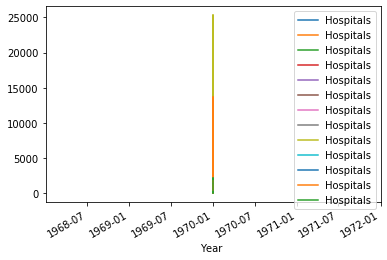

In [94]:
import matplotlib.pyplot as plt
for test in df['Province'].unique():
    if type(test) != str:
        continue
    df_test = df.loc[df['Province'] == test]
    #print(df_test.head())
    ax = plt.gca()
    df_test['Year '] = pd.to_datetime(df_test['Year '])
    df_test['Hospitals'] = df_test['Hospitals'].astype(float)
    df_test.plot(kind='line',x='Year ',y='Hospitals',ax=ax)
    #df_test.plot(kind='line',x='Year',y='Drugs', color='red', ax=ax)


In [88]:
print(df_test['Year '])

0       1999
1       2000
2       2001
3       2002
4       2003
5       2004
6       2005
7       2006
8       2007
9       2008
10      2009
11      2010
12      2011
13      2012
14      2013
15      2014
16      2015
17      2016
18      2017
19      2018
20      1999
21      2000
22      2001
23      2002
24      2003
25      2004
26      2005
27      2006
28      2007
29      2008
        ... 
7074    2009
7075    2010
7076    2011
7077    2012
7078    2013
7079    2014
7080    2015
7081    2016
7082    2017
7083    2018
7084    1999
7085    2000
7086    2001
7087    2002
7088    2003
7089    2004
7090    2005
7091    2006
7092    2007
7093    2008
7094    2009
7095    2010
7096    2011
7097    2012
7098    2013
7099    2014
7100    2015
7101    2016
7102    2017
7103    2018
Name: Year , Length: 468, dtype: int64


Text(0.5, 1.0, 'H1, Private-sector total health expenditure by use of funds in millions of dollars; Canada; 1988 to 2016')

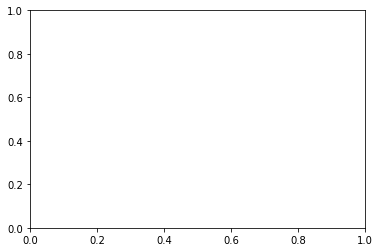

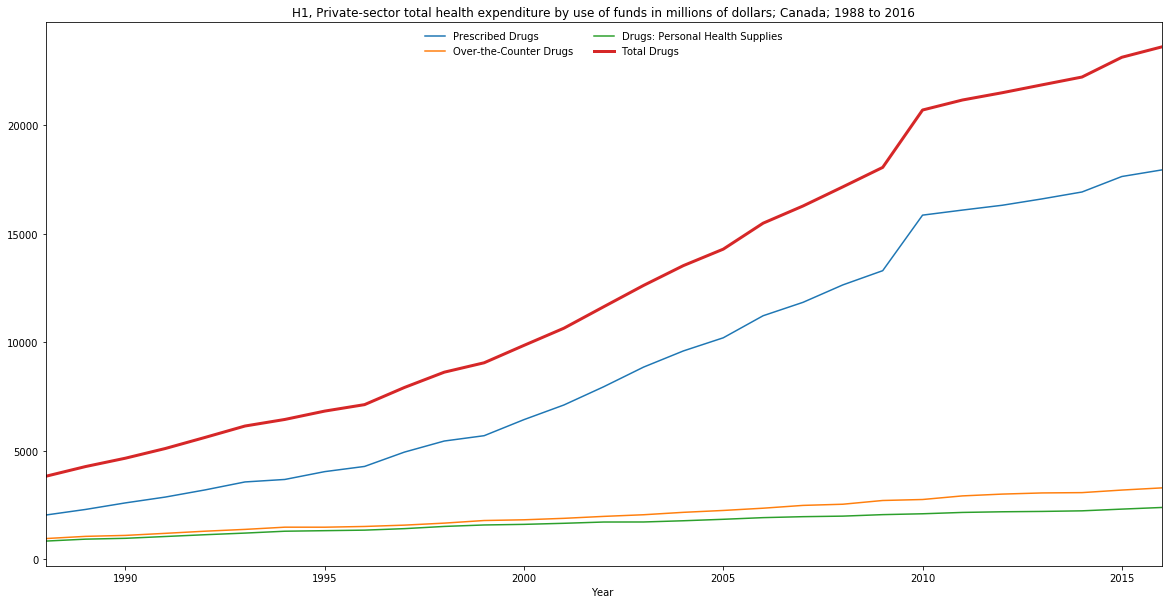

In [166]:
private_expenditure = pd.read_csv("data/canada_data/private_expenditure.csv")


ax = plt.gca()
df = private_expenditure.loc[private_expenditure["Category"].str.contains("H.1:")].copy()
fig,ax = plt.subplots(figsize=(20, 10))
#df['Year '] = pd.to_datetime(df['Year '])
#df['Other Institutions'] = df['Other Institutions'].astype(float)

col_list = ["Hospitals ",
"Other Institutions ", 
"Physicians ",
"Other Professionals: Dental Services " ,
"Other Professionals: Vision Care Services " ,
"Other Professionals: Other services",
"Total Other Professionals",
"Prescribed Drugs " ,
"Over-the-Counter Drugs",
"Drugs: Personal Health Supplies",
"Total Drugs",
"Capital ",
"Public Health " ,
"Administration " ]

col_list = [
"Prescribed Drugs " ,
"Over-the-Counter Drugs",
"Drugs: Personal Health Supplies",
"Total Drugs",
]
col_list = [
"Prescribed Drugs " ,
"Over-the-Counter Drugs",
"Drugs: Personal Health Supplies",
"Total Drugs"]


for col in col_list: 
    if "Total" in col: 
        df.plot(kind='line',x='Year ',y=col,ax=ax,linewidth=3.0)
    else:
        df.plot(kind='line',x='Year ',y=col,ax=ax)
    ax.legend(frameon=False, loc='upper center', ncol=2)
ax.set_title(r"H1, Private-sector total health expenditure by use of funds in millions of dollars; Canada; 1988 to 2016")

Text(0.5, 1.0, 'H2, Private-sector household (out-of-pocket) health expenditure by source of finance and use of funds in millions of dollars')

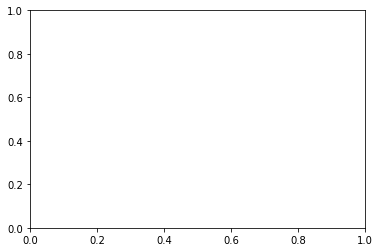

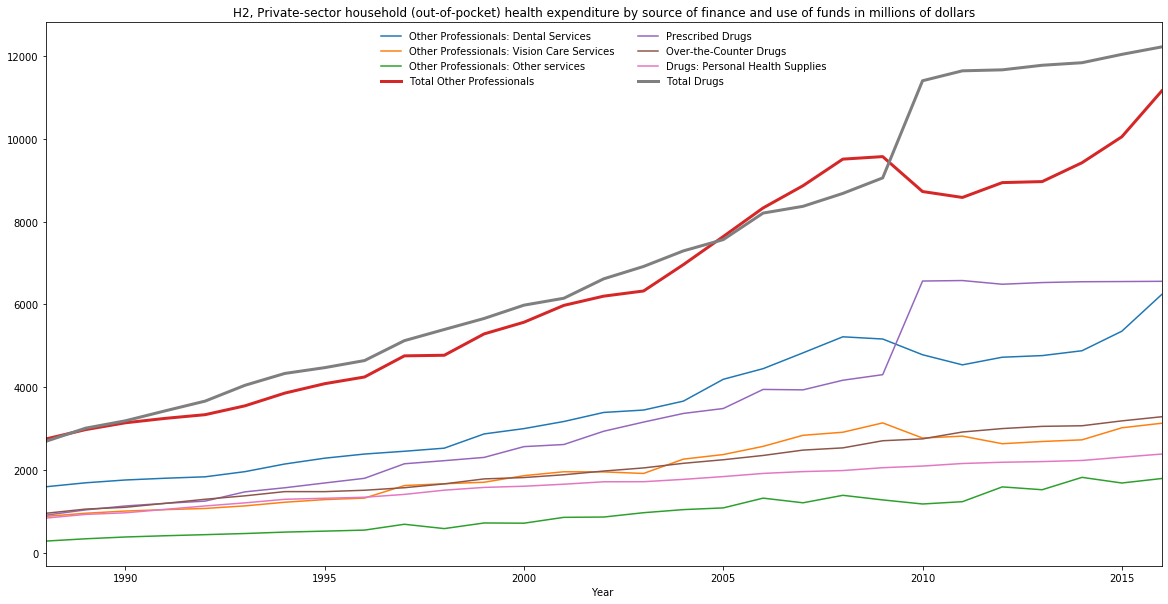

In [164]:
private_expenditure = pd.read_csv("data/canada_data/private_expenditure.csv")


ax = plt.gca()
df = private_expenditure.loc[private_expenditure["Category"].str.contains("H.2:")].copy()
fig,ax = plt.subplots(figsize=(20, 10))
#df['Year '] = pd.to_datetime(df['Year '])
#df['Other Institutions'] = df['Other Institutions'].astype(float)

col_list = ["Hospitals ",
"Other Institutions ", 
"Physicians ",
"Other Professionals: Dental Services " ,
"Other Professionals: Vision Care Services " ,
"Other Professionals: Other services",
"Total Other Professionals",
"Prescribed Drugs " ,
"Over-the-Counter Drugs",
"Drugs: Personal Health Supplies",
"Total Drugs",
"Capital ",
"Public Health " ,
"Administration " ]



col_list = [
"Other Professionals: Dental Services " ,
"Other Professionals: Vision Care Services " ,
"Other Professionals: Other services",
"Total Other Professionals",
"Prescribed Drugs " ,
"Over-the-Counter Drugs",
"Drugs: Personal Health Supplies",
"Total Drugs"
]

for col in col_list: 
    if "Total" in col: 
        df.plot(kind='line',x='Year ',y=col,ax=ax,linewidth=3.0)
    else:
        df.plot(kind='line',x='Year ',y=col,ax=ax)
    ax.legend(frameon=False, loc='upper center', ncol=2)
ax.set_title(r"H2, Private-sector household (out-of-pocket) health expenditure by source of finance and use of funds in millions of dollars")

Text(0.5, 1.0, 'H3, Private-sector insurance health expenditure by source of finance and use of funds in millions of dollars')

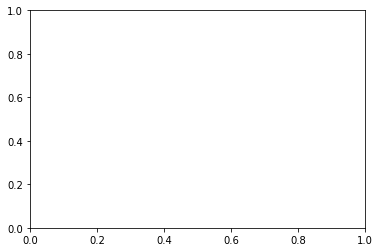

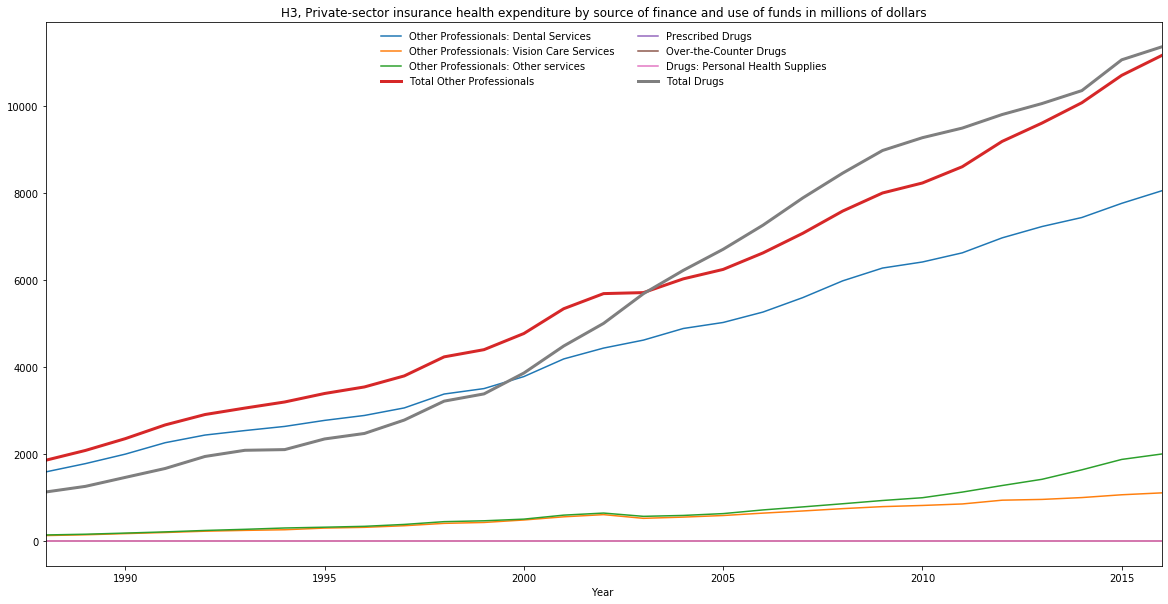

In [165]:
private_expenditure = pd.read_csv("data/canada_data/private_expenditure.csv")


ax = plt.gca()
df = private_expenditure.loc[private_expenditure["Category"].str.contains("H.3:")].copy()
fig,ax = plt.subplots(figsize=(20, 10))
#df['Year '] = pd.to_datetime(df['Year '])
#df['Other Institutions'] = df['Other Institutions'].astype(float)

col_list = ["Hospitals ",
"Other Institutions ", 
"Physicians ",
"Other Professionals: Dental Services " ,
"Other Professionals: Vision Care Services " ,
"Other Professionals: Other services",
"Total Other Professionals",
"Prescribed Drugs " ,
"Over-the-Counter Drugs",
"Drugs: Personal Health Supplies",
"Total Drugs",
"Capital ",
"Public Health " ,
"Administration " ]

col_list = [
"Other Professionals: Dental Services " ,
"Other Professionals: Vision Care Services " ,
"Other Professionals: Other services",
"Total Other Professionals",
"Prescribed Drugs " ,
"Over-the-Counter Drugs",
"Drugs: Personal Health Supplies",
"Total Drugs"
]

for col in col_list: 
    if "Total" in col: 
        df.plot(kind='line',x='Year ',y=col,ax=ax,linewidth=3.0)
    else:
        df.plot(kind='line',x='Year ',y=col,ax=ax)
    ax.legend(frameon=False, loc='upper center', ncol=2)
ax.set_title(r"H3, Private-sector insurance health expenditure by source of finance and use of funds in millions of dollars")

Text(0.5, 1.0, 'H4, Private-sector non-consumption health expenditure by source of finance and use of funds in millions of dollars')

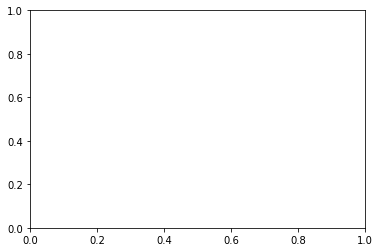

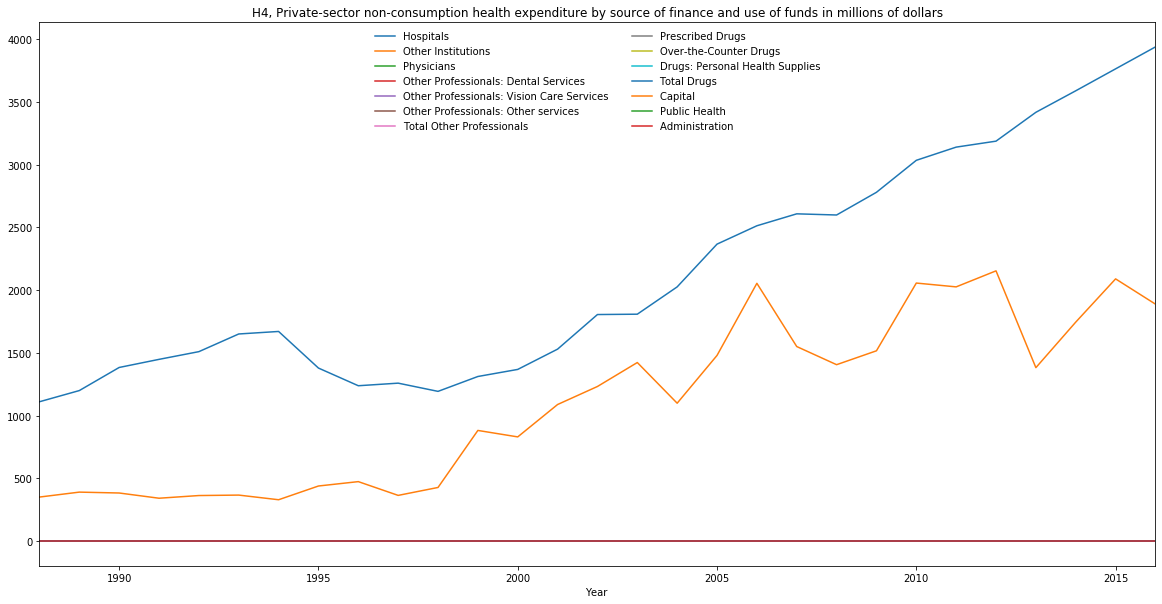

In [145]:
private_expenditure = pd.read_csv("data/canada_data/private_expenditure.csv")


ax = plt.gca()
df = private_expenditure.loc[private_expenditure["Category"].str.contains("H.4:")].copy()
fig,ax = plt.subplots(figsize=(20, 10))
#df['Year '] = pd.to_datetime(df['Year '])
#df['Other Institutions'] = df['Other Institutions'].astype(float)

col_list = ["Hospitals ",
"Other Institutions ", 
"Physicians ",
"Other Professionals: Dental Services " ,
"Other Professionals: Vision Care Services " ,
"Other Professionals: Other services",
"Total Other Professionals",
"Prescribed Drugs " ,
"Over-the-Counter Drugs",
"Drugs: Personal Health Supplies",
"Total Drugs",
"Capital ",
"Public Health " ,
"Administration " ]



for col in col_list: 
    df.plot(kind='line',x='Year ',y=col,ax=ax)
    ax.legend(frameon=False, loc='upper center', ncol=2)
ax.set_title(r"H4, Private-sector non-consumption health expenditure by source of finance and use of funds in millions of dollars")